In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as GS
%matplotlib inline

### Analysing the Results for shift 0

In this tutorial we analyse our results to see how good the predictions are and what are potential problems are.
For that we will visualize the results in different ways.

First we need to load our data, for that we specify all necessary parmeters like frame rate, shift and if we use head to thorax or thorax to head prediction.

In [2]:
# Frame rate
fps = 500

shifts = list(range(-25,25,2))+[0]
direction = [True, False]
keytemplate = '/forward_{}/temporal_{}'

Then we load the results for thorax to head orientation and we use shift 0

In [3]:
filename_best = 'chapter_4_results/Best/feed_forward_results_bee17_blk1_all_40.h5'
results = pd.read_hdf(filename_best, key = keytemplate.format(direction[1], None))
results.head()

0  pred_norm  error_angle  window_size  units  \
beeid blk_i frame_i                                                         
17    0     351.0   -0.011667   0.999996     0.316297           29     32   
            352.0   -0.011932   0.999999     0.289559           29     32   
            353.0   -0.011762   0.999997     0.245715           29     32   
            354.0   -0.011194   0.999991     0.192314           29     32   
            355.0   -0.010279   0.999982     0.132393           29     32   

                     test_target  test_target_error shift  ws  \
beeid blk_i frame_i                                             
17    0     351.0      -0.006148           0.006799   NaN  29   
            352.0      -0.006875           0.008411   NaN  29   
            353.0      -0.007467           0.007370   NaN  29   
            354.0      -0.007835           0.004405   NaN  29   
            355.0      -0.007961           0.005469   NaN  29   

                     test_observations  
beeid blk_i frame_i                     
17    0     351.0            -0.008907  
            352.0            -0.009683  
            353.0            -0.010262  
            354.0            -0.010567  
            355.0            -0.010598

### Explaining the shift

In this tutorial we will consider no shift in the observation data. That means we will not change the delay between the head and thorax movements

In [4]:
# Add sketch
results = pd.read_hdf(filename_best, key = keytemplate.format(True, None))
results = results.xs('17',level='beeid').xs(0,level='blk_i')

# Define range for sketch

idx_sketch = np.arange(1534,1575)
fig = plt.figure(figsize=(15,7))

ax = fig.add_subplot(111)
ws = 31
midpoint = idx_sketch[idx_sketch.shape[0]//2]
ax.fill_between([midpoint-ws//2,midpoint+ws//2],1550,2800, color='lightgray',alpha=1)
ax.plot(fps*np.rad2deg(results.loc[idx_sketch,0]),label='prediction', marker='.')
ax.plot(1800+fps*np.rad2deg(results.loc[idx_sketch,'test_observations']),label='observation', marker='.')
ax.plot(-1800+fps*np.rad2deg(results.loc[idx_sketch,'test_target']),label='target', marker='.')
ax.arrow(midpoint,1550, 0, -300,head_length=200,head_width=1, ec='gray', fc='gray')
ax.arrow(midpoint,400, 0, -600,head_length=200,head_width=1, ec='k', fc='k')
ax.arrow(midpoint,-100, 0, 600,head_length=200,head_width=1, ec='k', fc='k')
ax.text(midpoint+ws//2,1550,'ws: 31', color='k', fontsize='large', horizontalalignment='right')
ax.text(np.min(idx_sketch)-10,2000,'Observation', color='C1', fontsize='large', fontweight='bold')
ax.text(np.min(idx_sketch)-10,300,'Prediction', color='C0', fontsize='large', fontweight='bold')
ax.text(np.min(idx_sketch)-10,-1500,'Target', color='C2', fontsize='large', fontweight='bold')
ax.axis('off')


ax.set_ylabel('Angular velocity [$\circ$/s]\n\n')
fig.tight_layout()

The figure above shows an example of the observation and corresponding target and prediction that uses a window size of 31 and no shift. The window size is indicated by the gray box, that means all the observation in this box will be used to predict the orientation of the head (when using thorax to head prediction) at one point in time, which is indicated by the arrow in figure, which corresponds to the same point in time for the target orientation.

## Analyses

### visualizing the data

To get a better idea of the data, we first simply plot the observation, the target and the prediction to see, what we actually should have. First for thorax to head orientation

In [5]:
# Create a figure to show prediction
fig = plt.figure(figsize=(15,7))
#gs = GS.GridSpec(6, 10)
ax = fig.add_subplot(111)#gs[1,:7])


# Plot time course of head to thorax prediction
# Head to thorax
ax.plot(results.index/fps,fps*np.rad2deg(results.loc[:,0]),label='prediction')
ax.plot(results.index/fps,fps*np.rad2deg(results.loc[:,'test_observations']),label='observation')
ax.plot(results.index/fps,fps*np.rad2deg(results.loc[:,'test_target']),label='target')
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
#ax.set_ylabel(r'H$\rightarrow$T')
ax.text(0.075, 0.8,r'Thorax$\rightarrow$Head',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)

Text(0.075, 0.8, 'Thorax$\\rightarrow$Head')

And then for head to thorax orientation, so first we load the data

In [7]:
results_rev = pd.read_hdf(filename_best, key = keytemplate.format(direction[0], None))
results_rev.head()

0  pred_norm  error_angle  window_size  units  \
beeid blk_i frame_i                                                         
17    0     359.0   -0.004317   0.999974     0.245358           45      4   
            360.0   -0.004400   0.999974     0.189498           45      4   
            361.0   -0.004422   0.999974     0.142665           45      4   
            362.0   -0.004451   0.999974     0.098603           45      4   
            363.0   -0.004457   0.999974     0.058761           45      4   

                     test_target  test_target_error shift  ws  \
beeid blk_i frame_i                                             
17    0     359.0      -0.008604           0.004790   NaN  45   
            360.0      -0.007714           0.005812   NaN  45   
            361.0      -0.006912           0.006806   NaN  45   
            362.0      -0.006179           0.005638   NaN  45   
            363.0      -0.005463           0.004471   NaN  45   

                     test_observations  
beeid blk_i frame_i                     
17    0     359.0            -0.007625  
            360.0            -0.007428  
            361.0            -0.007155  
            362.0            -0.006831  
            363.0            -0.006398

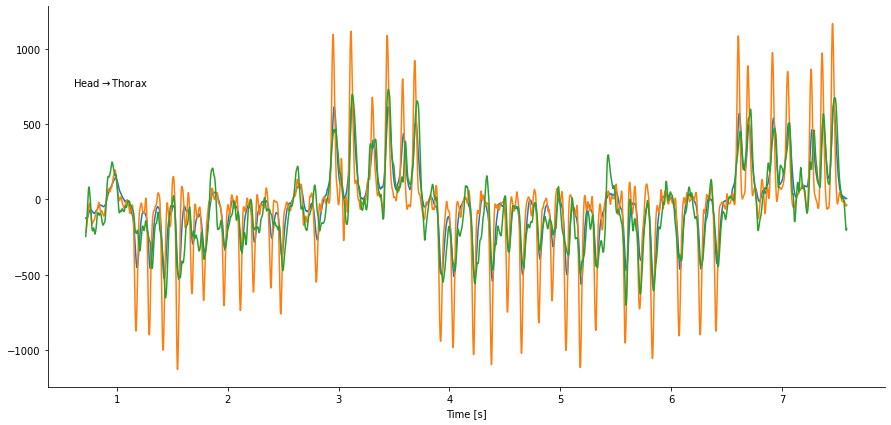

In [8]:
# Plot time course of thorax to head prediction
# thorax to head
fig = plt.figure(figsize=(15,7))

results_rev = results_rev.xs('17',level='beeid').xs(0,level='blk_i')

ax = fig.add_subplot(111)#gs[1,:7])

ax.plot(results_rev.index/fps,fps*np.rad2deg(results_rev.loc[:,0]),label='Prediction | Head velocity')
ax.plot(results_rev.index/fps,fps*np.rad2deg(results_rev.loc[:,'test_observations']),label='Observation')
ax.plot(results_rev.index/fps,fps*np.rad2deg(results_rev.loc[:,'test_target']),label='target')
ax.set_xlabel('Time [s]')
ax.text(0.075, 0.8,r'Head$\rightarrow$Thorax',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

To see better what happens we zoom into the figures

In [9]:
# Define range for zoom
idx_zoom = np.arange(1500,2000)


Text(0, 0.5, 'common Y')

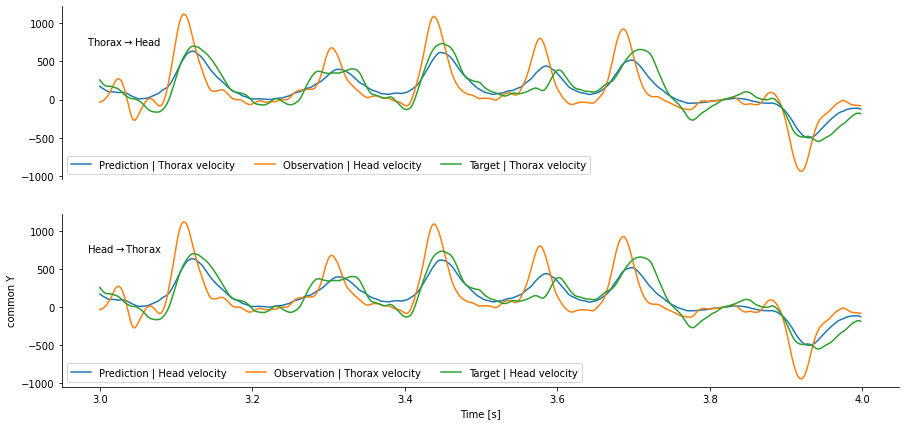

In [10]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(211)
ax.plot(idx_zoom/fps,fps*np.rad2deg(results.loc[idx_zoom,0]),label='Prediction | Thorax velocity')
ax.plot(idx_zoom/fps,fps*np.rad2deg(results.loc[idx_zoom,'test_observations']),label='Observation | Head velocity')
ax.plot(idx_zoom/fps,fps*np.rad2deg(results.loc[idx_zoom,'test_target']),label='Target | Thorax velocity')
ax.text(0.075, 0.8,r'Thorax$\rightarrow$Head',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
ax.set_xlabel('Time [s]')
ax.legend(ncol=3)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
# Error distribution (for boxplot below)
error_angle_headbody = fps*results.loc[:,'error_angle']


ax=fig.add_subplot(212)
ax.plot(idx_zoom/fps,fps*np.rad2deg(results_rev.loc[idx_zoom,0]),label='Prediction | Head velocity')
ax.plot(idx_zoom/fps,fps*np.rad2deg(results_rev.loc[idx_zoom,'test_observations']),label='Observation | Thorax velocity')
ax.plot(idx_zoom/fps,fps*np.rad2deg(results_rev.loc[idx_zoom,'test_target']),label='Target | Head velocity')
ax.set_xlabel('Time [s]')
ax.text(0.075, 0.8,r'Head$\rightarrow$Thorax',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
ax.legend(ncol=3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Error distribution
error_angle_bodyhead = fps*results.loc[:,'error_angle']
plt.ylabel("common Y")

We can see that the prediction and target are very close. However, if there is no saccade in the observation, it seams like we fail to predict saccades in the target, however, this makes sense, as we do not have any possible information about a saccade in the target data in the observation data.

### Analysing the error

To analyse the difference in the error between the head to thorax and thorax to head, we look at the boxplots of both

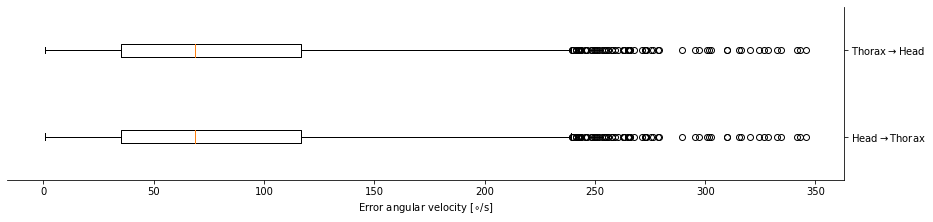

In [11]:
error_angle_headbody = fps*results.loc[:,'error_angle']
error_angle_bodyhead = fps*results_rev.loc[:,'error_angle']

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(211)
# Create box plot 
ax.boxplot([error_angle_headbody.dropna().values, error_angle_bodyhead.dropna().values],
           vert=False);
ax.set_yticklabels([r'Head$\rightarrow$Thorax',r'Thorax$\rightarrow$Head'])
ax.set_xlabel('Error angular velocity [$\circ$/s]')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)



We can see that the median of the errors are the same for the thorax to head than head to thorax but that the range for the head to thorax predictions is much wider and bigger errors occur. Biologically this makes sense as if there is a saccade it is well distinguishable no matter wether it is a head or thorax saccade but the thorax is slower and makes less "clear" movements for example head saccades are faster and turn more (have a greater angle) than the thorax. Also when there is no saccade occuring, the head might be more independent from the thorax than vice versa. This can be seen in the next figure. We fitting the errors with a general kernel density estimate (KDE) using a gaussian kernel.  

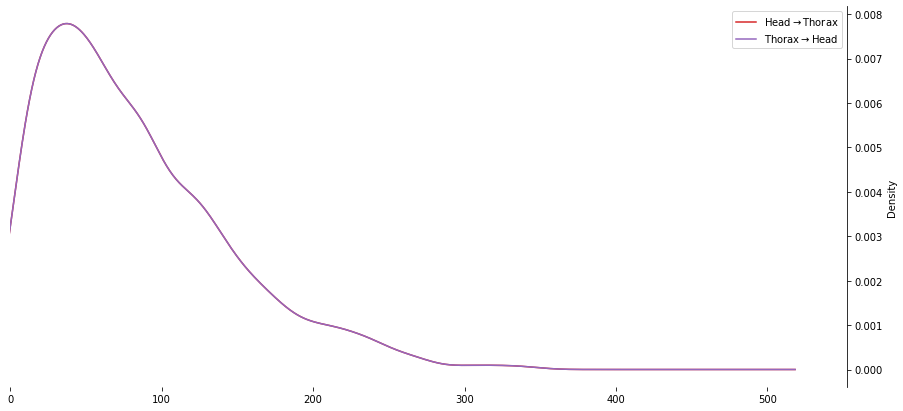

In [12]:
fig = plt.figure(figsize=(15,7))

ax = fig.add_subplot(111)
error_angle_headbody.dropna().plot.kde(ax=ax, color='C3', label=r'Head$\rightarrow$Thorax');
error_angle_bodyhead.dropna().plot.kde(ax=ax, color='C4', label=r'Thorax$\rightarrow$Head');
ax.set_xlim([0,max(ax.get_xlim())])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend()

Here we can see, that most errors of both directions have the same value, However, for thorax to head orientation, the density is higher than for the oposite direction and for thorax to head more bigger errors exist.

### Put everything together

for a better overview we plot everything together in one plot now

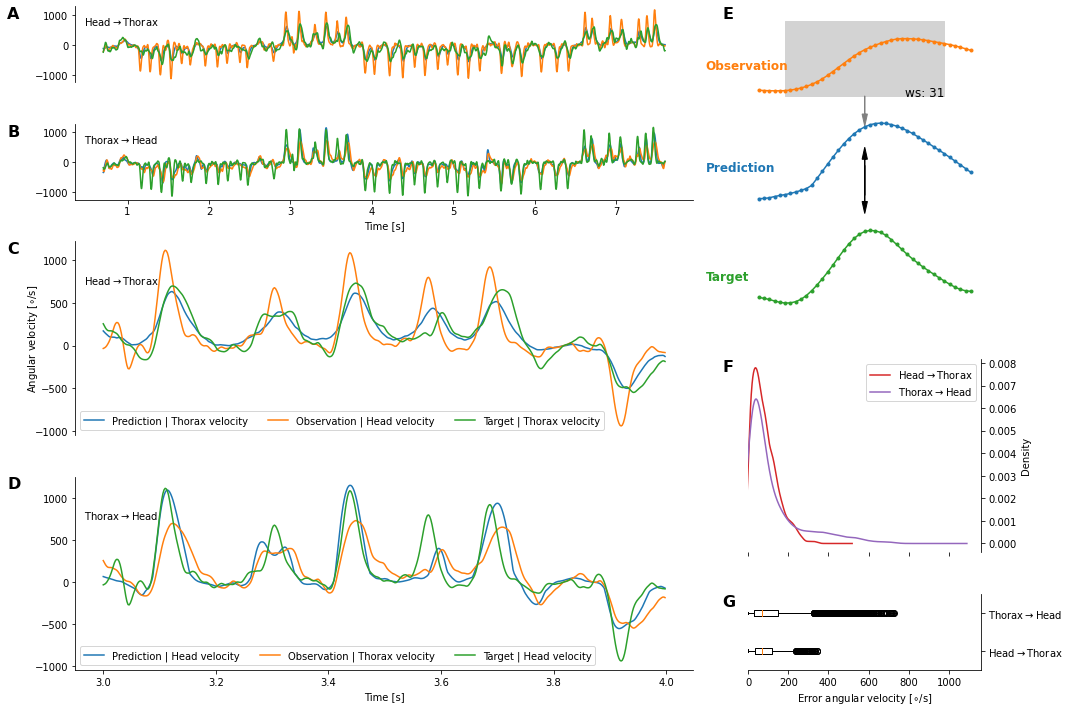

In [13]:
# Create a figure to show prediction
fig = plt.figure(figsize=(15,10))
axarr = dict()
gs = GS.GridSpec(6, 10)
axarr['bodyhead'] = fig.add_subplot(gs[1,:7])
axarr['headbody'] = fig.add_subplot(gs[0,:7])
axarr['bodyhead_zoom'] = fig.add_subplot(gs[4:6,:7])
axarr['headbody_zoom'] = fig.add_subplot(gs[2:4,:7])
axarr['comp_boxplot'] = fig.add_subplot(gs[5,7:10])
axarr['comp_hist'] = fig.add_subplot(gs[3:5,7:10], sharex=axarr['comp_boxplot'])
axarr['sketch'] = fig.add_subplot(gs[0:3,7:10])

# Define range for zoom and sketch
idx_zoom = np.arange(1500,2000)
idx_sketch = np.arange(1534,1575)

# Plot time course of head to thorax prediction
# Head to thorax
results = pd.read_hdf(filename_best, key = keytemplate.format(True, None))
results = results.xs('17',level='beeid').xs(0,level='blk_i')
ax=axarr['headbody']
ax.plot(results.index/fps,fps*np.rad2deg(results.loc[:,0]),label='prediction')
ax.plot(results.index/fps,fps*np.rad2deg(results.loc[:,'test_observations']),label='observation')
ax.plot(results.index/fps,fps*np.rad2deg(results.loc[:,'test_target']),label='target')
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
#ax.set_ylabel(r'H$\rightarrow$T')
ax.text(0.075, 0.8,r'Head$\rightarrow$Thorax',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
# Zoom
ax=axarr['headbody_zoom']
ax.plot(idx_zoom/fps,fps*np.rad2deg(results.loc[idx_zoom,0]),label='Prediction | Thorax velocity')
ax.plot(idx_zoom/fps,fps*np.rad2deg(results.loc[idx_zoom,'test_observations']),label='Observation | Head velocity')
ax.plot(idx_zoom/fps,fps*np.rad2deg(results.loc[idx_zoom,'test_target']),label='Target | Thorax velocity')
ax.text(0.075, 0.8,r'Head$\rightarrow$Thorax',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
ax.set_xlabel('Time [s]')
ax.legend(ncol=3)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
# Error distribution (for boxplot below)
error_angle_headbody = fps*results.loc[:,'error_angle']

# Plot time course of thorax to head prediction
# thorax to head
results = pd.read_hdf(filename_best, key = keytemplate.format(False, None))
results = results.xs('17',level='beeid').xs(0,level='blk_i')
ax=axarr['bodyhead']
ax.plot(results.index/fps,fps*np.rad2deg(results.loc[:,0]),label='Prediction | Head velocity')
ax.plot(results.index/fps,fps*np.rad2deg(results.loc[:,'test_observations']),label='Observation')
ax.plot(results.index/fps,fps*np.rad2deg(results.loc[:,'test_target']),label='target')
ax.set_xlabel('Time [s]')
ax.text(0.075, 0.8,r'Thorax$\rightarrow$Head',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Zoom
ax=axarr['bodyhead_zoom']
ax.plot(idx_zoom/fps,fps*np.rad2deg(results.loc[idx_zoom,0]),label='Prediction | Head velocity')
ax.plot(idx_zoom/fps,fps*np.rad2deg(results.loc[idx_zoom,'test_observations']),label='Observation | Thorax velocity')
ax.plot(idx_zoom/fps,fps*np.rad2deg(results.loc[idx_zoom,'test_target']),label='Target | Head velocity')
ax.set_xlabel('Time [s]')
ax.text(0.075, 0.8,r'Thorax$\rightarrow$Head',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
ax.legend(ncol=3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Error distribution
error_angle_bodyhead = fps*results.loc[:,'error_angle']
plt.ylabel("common Y")


# Create box plot
ax = axarr['comp_boxplot']
ax.boxplot([error_angle_headbody.dropna().values, error_angle_bodyhead.dropna().values],
           vert=False);
ax.set_yticklabels([r'Head$\rightarrow$Thorax',r'Thorax$\rightarrow$Head'])
ax.set_xlabel('Error angular velocity [$\circ$/s]')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = axarr['comp_hist']
error_angle_headbody.dropna().plot.kde(ax=ax, color='C3', label=r'Head$\rightarrow$Thorax');
error_angle_bodyhead.dropna().plot.kde(ax=ax, color='C4', label=r'Thorax$\rightarrow$Head');
ax.set_xlim([0,max(ax.get_xlim())])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend()


# Add sketch
ax = axarr['sketch'] 
ws = 31
midpoint = idx_sketch[idx_sketch.shape[0]//2]
ax.fill_between([midpoint-ws//2,midpoint+ws//2],1550,2800, color='lightgray',alpha=1)
ax.plot(fps*np.rad2deg(results.loc[idx_sketch,0]),label='prediction', marker='.')
ax.plot(1800+fps*np.rad2deg(results.loc[idx_sketch,'test_observations']),label='observation', marker='.')
ax.plot(-1800+fps*np.rad2deg(results.loc[idx_sketch,'test_target']),label='target', marker='.')
ax.arrow(midpoint,1550, 0, -300,head_length=200,head_width=1, ec='gray', fc='gray')
ax.arrow(midpoint,400, 0, -600,head_length=200,head_width=1, ec='k', fc='k')
ax.arrow(midpoint,-100, 0, 600,head_length=200,head_width=1, ec='k', fc='k')
ax.text(midpoint+ws//2,1550,'ws: 31', color='k', fontsize='large', horizontalalignment='right')
ax.text(np.min(idx_sketch)-10,2000,'Observation', color='C1', fontsize='large', fontweight='bold')
ax.text(np.min(idx_sketch)-10,300,'Prediction', color='C0', fontsize='large', fontweight='bold')
ax.text(np.min(idx_sketch)-10,-1500,'Target', color='C2', fontsize='large', fontweight='bold')
ax.axis('off')

fig.tight_layout()


ax = axarr['headbody_zoom']
ax.yaxis.set_label_coords(-0.02,0.5)
ax.set_ylabel('Angular velocity [$\circ$/s]\n\n')


# Add text
ax = axarr['bodyhead']
ax.text(-0.11, 1.0, 'B', horizontalalignment='left',
        verticalalignment='top', transform=ax.transAxes, weight='bold', fontsize=16)
ax = axarr['headbody']
ax.text(-0.11, 1.0, 'A', horizontalalignment='left',
        verticalalignment='top', transform=ax.transAxes, weight='bold', fontsize=16)
ax = axarr['bodyhead_zoom']
ax.text(-0.11, 1.0, 'D', horizontalalignment='left',
        verticalalignment='top', transform=ax.transAxes, weight='bold', fontsize=16)
ax = axarr['headbody_zoom']
ax.text(-0.11, 1.0, 'C', horizontalalignment='left',
        verticalalignment='top', transform=ax.transAxes, weight='bold', fontsize=16)
ax = axarr['comp_boxplot']
ax.text(-0.11, 1.0, 'G', horizontalalignment='left',
        verticalalignment='top', transform=ax.transAxes, weight='bold', fontsize=16)
ax = axarr['comp_hist']
ax.text(-0.11, 1.0, 'F', horizontalalignment='left',
        verticalalignment='top', transform=ax.transAxes, weight='bold', fontsize=16)
ax = axarr['sketch']
ax.text(-0.11, 1.0, 'E', horizontalalignment='left',
        verticalalignment='top', transform=ax.transAxes, weight='bold', fontsize=16)


plt.tight_layout()
fig.savefig('chapter_4_results/chap_04e_HeadThoraxPrediction.png', bbox_inches = "tight")
fig.savefig('chapter_4_results/chap_04e_HeadThoraxPrediction.svg',  bbox_inches = "tight")